In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read in data
df = pd.read_excel('Week2_challenge_data_source.xlsx')

In [5]:
df[['Bearer Id', 'MSISDN/Number', 'Dur. (ms)']].tail()

,Bearer Id,MSISDN/Number,Dur. (ms)
149996,7277825670196679680,3.365069e+10,81230.0
149997,7349883264234609664,3.366345e+10,97970.0
149998,13114483573367300096,3.362189e+10,98249.0
149999,13114483573367300096,3.361962e+10,97910.0
150000,,NaN,NaN


In [6]:
df.loc[150000]

Bearer Id                                              
Start                                               NaT
Start ms                                            NaN
End                                                 NaT
End ms                                              NaN
Dur. (ms)                                           NaN
IMSI                                                NaN
MSISDN/Number                                       NaN
IMEI                                                NaN
Last Location Name                                  NaN
Avg RTT DL (ms)                                     NaN
Avg RTT UL (ms)                                     NaN
Avg Bearer TP DL (kbps)                             NaN
Avg Bearer TP UL (kbps)                             NaN
TCP DL Retrans. Vol (Bytes)                         NaN
TCP UL Retrans. Vol (Bytes)                         NaN
DL TP < 50 Kbps (%)                                 NaN
50 Kbps < DL TP < 250 Kbps (%)                  

In [7]:
#sum download and upload column for each application
df['Social'] = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']
df['Google'] = df['Google DL (Bytes)'] + df['Google UL (Bytes)']
df['Email'] = df['Email DL (Bytes)'] + df['Email UL (Bytes)']
df['Youtube'] = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']
df['Netflix'] = df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']
df['Gaming'] = df['Google DL (Bytes)'] + df['Google UL (Bytes)']
df['Other'] = df['Other DL (Bytes)'] + df['Other UL (Bytes)']

In [38]:
#Needed variables
df2 = df[['Bearer Id','Dur. (ms)','Social',
       'Google', 'Email', 'Youtube', 'Netflix', 'Gaming','Total UL (Bytes)', 'Total DL (Bytes)']]

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Bearer Id         150001 non-null  object 
 1   Dur. (ms)         150000 non-null  float64
 2   Social            150001 non-null  float64
 3   Google            150001 non-null  float64
 4   Email             150001 non-null  float64
 5   Youtube           150001 non-null  float64
 6   Netflix           150001 non-null  float64
 7   Gaming            150001 non-null  float64
 8   Total UL (Bytes)  150000 non-null  float64
 9   Total DL (Bytes)  150000 non-null  float64
dtypes: float64(9), object(1)
memory usage: 11.4+ MB


In [10]:
#replace all '' in the column for easier identification
df2['Bearer Id'] = df2['Bearer Id'].replace({'':0})

,Bearer Id,Dur. (ms),Social,Google,Email,Youtube,Netflix,Gaming,Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,1823652.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,2905912.0,36749741.0,308879636.0
1,13114483482878900224,1365104.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,4414096.0,53800391.0,653384965.0
2,13114483484080500736,1361762.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,10229119.0,27883638.0,279807335.0
3,13114483485442799616,1321509.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,11811761.0,43324218.0,846028530.0
4,13114483499480700928,1089009.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,7748843.0,38542814.0,569138589.0


Univariate Analysis

In [48]:
df2.describe()

,Dur. (ms).1,Social,Google,Email,Youtube,Netflix,Gaming,Total UL (Bytes),Total DL (Bytes)
count,1.500000e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.046091e+08,1.828250e+06,7.807295e+06,2.259102e+06,2.264348e+07,2.262861e+07,7.807295e+06,4.112121e+07,4.546434e+08
std,8.103761e+07,1.035646e+06,3.516420e+06,1.071109e+06,9.246800e+06,9.260820e+06,3.516420e+06,1.127639e+07,2.441429e+08
min,7.142988e+06,1.563000e+03,4.033000e+04,8.359000e+03,7.890300e+04,9.843200e+04,4.033000e+04,2.866892e+06,7.114041e+06
25%,5.744079e+07,9.322180e+05,4.943599e+06,1.359344e+06,1.599846e+07,1.597946e+07,4.943599e+06,3.322201e+07,2.431068e+08
50%,8.639998e+07,1.826471e+06,7.812835e+06,2.263567e+06,2.266177e+07,2.263554e+07,7.812835e+06,4.114331e+07,4.558411e+08
75%,1.324308e+08,2.727487e+06,1.068280e+07,3.159818e+06,2.929260e+07,2.929044e+07,1.068280e+07,4.903424e+07,6.657055e+08
max,1.859336e+09,3.650861e+06,1.552878e+07,4.518036e+06,4.519008e+07,4.519815e+07,1.552878e+07,7.833131e+07,9.029696e+08


In [49]:
df2["Total DL (Bytes)"].sum()

68196514511845.0

plot the distribution for each column

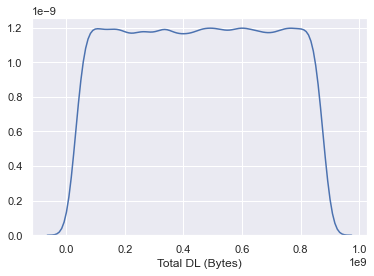

In [14]:
sns.distplot(df2['Total DL (Bytes)'], hist = False);

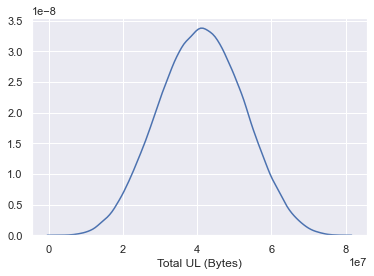

In [15]:
sns.distplot(df2['Total UL (Bytes)'], hist = False);

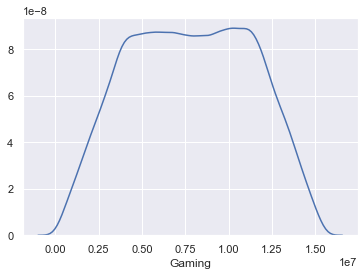

In [16]:
sns.distplot(df2['Gaming'], hist = False);

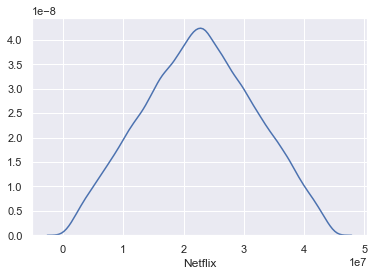

In [17]:
sns.distplot(df2['Netflix'], hist = False);

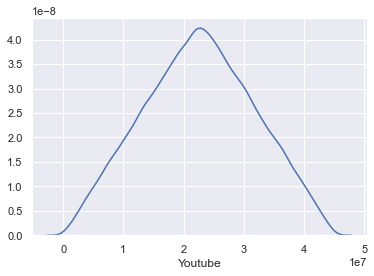

In [18]:
sns.distplot(df2['Youtube'], hist = False);

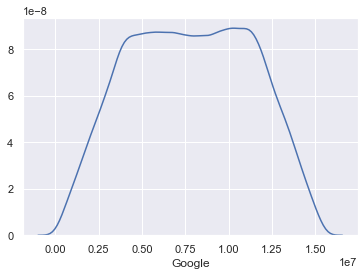

In [19]:
sns.distplot(df2['Google'], hist = False);

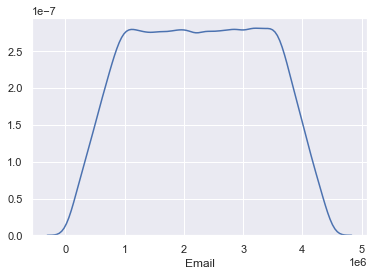

In [50]:
sns.distplot(df2['Email'], hist = False);

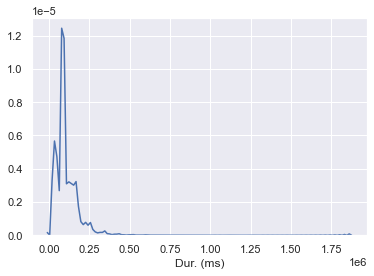

In [21]:
sns.distplot(df2['Dur. (ms)'], hist = False);

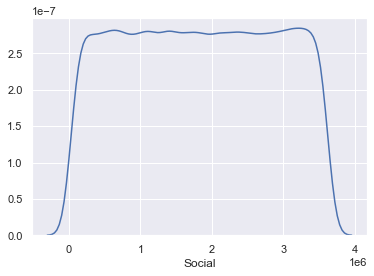

In [22]:
sns.distplot(df2['Social'], hist = False);

Bivariate relationship

In [31]:
df2['TotalUl/Dl'] = df2['Total DL (Bytes)'] + df2['Total UL (Bytes)']

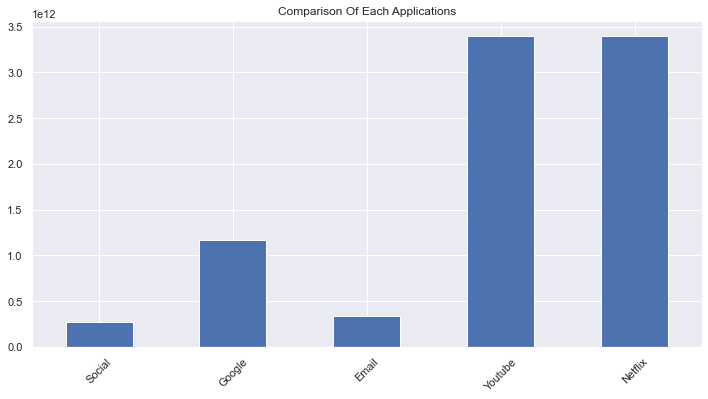

In [56]:
#Plot how each application compare.
plt.figure(figsize = (12,6))
df2[df2.columns[2:-3]].sum().plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.title("Comparison Of Each Applications");

In [ ]:
sns.pairplot(df2)